In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
us_states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [3]:
power_plants = pd.read_csv("powerplants.csv")
power_plants.head()
points = power_plants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

power_plants = gpd.GeoDataFrame(power_plants, geometry = points)
power_plants.crs= {'init': 'epsg:4326'}
power_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)


In [4]:
us_states_conv = us_states.to_crs(power_plants.crs)
us_states_conv.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [5]:
power_plants_states = gpd.sjoin(power_plants, us_states_conv, how = "left",  op='intersects')
power_plants_states.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [6]:
power_plants_states["NAME"].value_counts()

California              1222
North Carolina           461
Texas                    396
New York                 372
Minnesota                274
Massachusetts            254
Iowa                     222
Michigan                 219
New Jersey               207
Pennsylvania             207
Illinois                 200
Wisconsin                174
Colorado                 153
Ohio                     148
Oregon                   145
Florida                  144
Georgia                  139
Washington               138
Alaska                   138
Idaho                    136
Indiana                  133
Virginia                 131
Kansas                   129
Missouri                 117
Arizona                  113
Nebraska                  98
Maine                     97
South Carolina            95
Oklahoma                  94
New Mexico                92
Utah                      89
Connecticut               88
Louisiana                 84
Maryland                  76
Vermont       

Which power plants are in New York?

In [7]:
power_plants_states[power_plants_states["NAME"] == "New York"]

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas & Elec Corp,3249,Electric Utility,Coxsackie,Greene,12051,Baily Street,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY


In [8]:
power_plants_states.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


Which state has the most hydroelectric power plants?

In [9]:
power_plants_states_hydroelectric = power_plants_states[power_plants_states["PrimSource"] == "hydroelectric"]
power_plants_states_hydroelectric["NAME"].value_counts()

California        245
New York          159
Washington         77
Idaho              75
Oregon             60
Wisconsin          59
Michigan           53
Maine              52
Colorado           43
Vermont            42
North Carolina     41
New Hampshire      38
South Carolina     31
Utah               29
Georgia            29
Massachusetts      28
Tennessee          27
Alabama            23
Virginia           23
Montana            23
Alaska             23
Texas              22
Minnesota          21
Arkansas           19
Pennsylvania       16
Wyoming            16
Connecticut        13
West Virginia      12
Oklahoma           10
Nebraska           10
Kentucky            9
Illinois            8
Nevada              7
Arizona             7
Hawaii              7
Indiana             6
Missouri            5
Ohio                4
South Dakota        4
New Mexico          4
Maryland            3
New Jersey          2
Rhode Island        2
Florida             2
Iowa                2
Kansas    

Which state produces the most energy from coal?

In [10]:
power_plants_states_coal = power_plants_states[power_plants_states["PrimSource"] == "coal"]
power_plants_states_coal["NAME"].value_counts()

Pennsylvania      24
Illinois          22
Texas             21
Indiana           20
Iowa              18
Michigan          16
Ohio              16
Missouri          16
Kentucky          14
North Carolina    13
Minnesota         12
Wyoming           12
Wisconsin         12
West Virginia     11
Nebraska          10
Virginia          10
Colorado          10
Florida           10
North Dakota      10
South Carolina     8
Maryland           7
Oklahoma           6
Utah               6
Tennessee          6
Alabama            6
Georgia            6
Kansas             6
Montana            5
Arizona            5
New York           5
Arkansas           5
New Jersey         4
Alaska             4
Nevada             3
Mississippi        3
New Mexico         3
New Hampshire      2
Louisiana          2
Idaho              2
California         2
Washington         1
Hawaii             1
Massachusetts      1
Delaware           1
Oregon             1
South Dakota       1
Connecticut        1
Name: NAME, d

Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

In [11]:
us_states_conv.reset_index().head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [12]:
pd.set_option('display.max_columns', 500)

us_states_powerplants = gpd.sjoin(us_states_conv.reset_index(), power_plants, how='inner', op='intersects')
us_states_powerplants.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,21,Yates Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,County Road 44,hydroelectric,47.0,0.0,0.0,0.0,NaN,47.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,19,Thurlow Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,249 Outer Drive,hydroelectric,78.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1944,6188,Harris Dam,Alabama Power Co,195,Electric Utility,Lineville,Randolph,36266,2671 County Road 100,hydroelectric,132.0,0.0,0.0,0.0,NaN,132.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047


In [13]:
us_states_powerplants["nuclear_count"] = us_states_powerplants.groupby('index').size()
us_states_powerplants.head()


,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,21,Yates Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,County Road 44,hydroelectric,47.0,0.0,0.0,0.0,NaN,47.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,19,Thurlow Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,249 Outer Drive,hydroelectric,78.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1944,6188,Harris Dam,Alabama Power Co,195,Electric Utility,Lineville,Randolph,36266,2671 County Road 100,hydroelectric,132.0,0.0,0.0,0.0,NaN,132.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047,72


In [14]:

us_states_powerplants['nuclear_count'] = us_states_powerplants['nuclear_count'].fillna(0)


In [15]:
us_states_powerplants_nuclear = us_states_powerplants[us_states_powerplants["PrimSource"].str.contains("nuclear")] 
us_states_powerplants_nuclear.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1820,6001,Joseph M Farley,Alabama Power Co,195,Electric Utility,Columbia,Houston,36319,7388 North State Highway 95,nuclear,1757.0,0.0,0.0,0.0,NaN,0.0,0.0,1757.0,0.0,0.0,NaN,NaN,Nuclear = 1757 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,31.223100,-85.111600,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",22,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,35609,Shaw Rd. PO Box 2000,nuclear,3309.4,0.0,0.0,0.0,NaN,0.0,0.0,3309.4,0.0,0.0,NaN,NaN,Nuclear = 3309.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,34.704200,-87.118900,72
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",1824,6008,Palo Verde,Arizona Public Service Co,803,Electric Utility,Wintersburg,Maricopa,85036,Wintersburg Road,nuclear,3937.0,0.0,0.0,0.0,NaN,0.0,0.0,3937.0,0.0,0.0,NaN,NaN,Nuclear = 3937 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,33.388100,-112.861700,113
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",2547,8055,Arkansas Nuclear One,Entergy Arkansas Inc,814,Electric Utility,Russellville,Pope,72801,1448 STATE RD 333,nuclear,1808.5,0.0,0.0,0.0,NaN,0.0,0.0,1808.5,0.0,0.0,NaN,NaN,Nuclear = 1808.5 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,35.311000,-93.235100,55
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1885,6099,Diablo Canyon,Pacific Gas & Electric Co,14328,Electric Utility,Avila Beach,San Luis Obispo,93424,Avila Rd. bet. Montano de Oro,nuclear,2240.0,0.0,0.0,0.0,NaN,0.0,0.0,2240.0,0.0,0.0,NaN,NaN,Nuclear = 2240 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,35.211536,-120.855542,1222


In [16]:
us_states_powerplants_no_nuclear = us_states_powerplants[~us_states_powerplants["PrimSource"].str.contains("nuclear")] 
us_states_powerplants_no_nuclear.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,21,Yates Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,County Road 44,hydroelectric,47.0,0.0,0.0,0.0,NaN,47.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,19,Thurlow Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,249 Outer Drive,hydroelectric,78.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1944,6188,Harris Dam,Alabama Power Co,195,Electric Utility,Lineville,Randolph,36266,2671 County Road 100,hydroelectric,132.0,0.0,0.0,0.0,NaN,132.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047,72


In [17]:
us_states_powerplants_no_nuclear.drop_duplicates(subset="NAME", inplace = True)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
us_states_powerplants_nuclear.drop_duplicates(subset="NAME", inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(-197.09527795, 197.72483894999999, 16.287620949999997, 73.987902050000017)

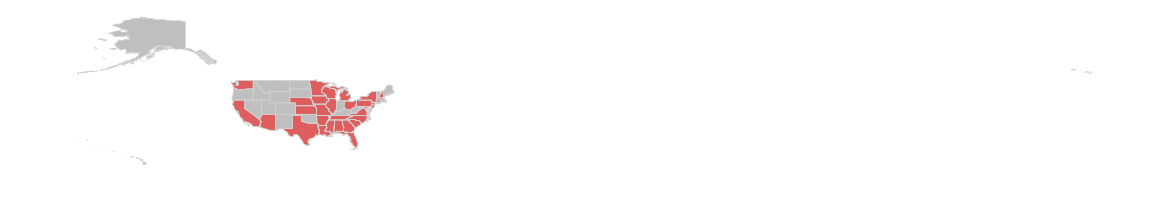

In [19]:
ax=us_states_powerplants_no_nuclear.plot(linewidth = 0.6, edgecolor = "lightgrey", color='grey', figsize = (20,7))
us_states_powerplants_nuclear.plot(linewidth = 0.6, edgecolor = "lightgrey", color='red', ax=ax, figsize = (20,7))   
ax.axis("off")



In [20]:
us_states_powerplants_solar = us_states_powerplants[us_states_powerplants["PrimSource"].str.contains("solar")] 
us_states_powerplants_solar.head()
us_states_powerplants_no_solar = us_states_powerplants[~us_states_powerplants["PrimSource"].str.contains("solar")] 
us_states_powerplants_no_solar.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",4158,55411,Hillabee Energy Center,CER Generation LLC,55987,IPP Non-CHP,Alexander City,Tallapoosa,35010,152 Brick Plant Road,natural gas,721.8,0.0,721.8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 721.8 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,33.000669,-85.903278,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,21,Yates Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,County Road 44,hydroelectric,47.0,0.0,0.0,0.0,NaN,47.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 47 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.574300,-85.890100,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,19,Thurlow Dam,Alabama Power Co,195,Electric Utility,Tallassee,Elmore,36078,249 Outer Drive,hydroelectric,78.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 78 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.535436,-85.887614,72
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1944,6188,Harris Dam,Alabama Power Co,195,Electric Utility,Lineville,Randolph,36266,2671 County Road 100,hydroelectric,132.0,0.0,0.0,0.0,NaN,132.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 132 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.258281,-85.616047,72


In [21]:
us_states_powerplants_no_solar.drop_duplicates(subset="NAME", inplace = True)
us_states_powerplants_solar.drop_duplicates(subset="NAME", inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-197.09527795, 197.72483894999999, 16.287620949999997, 73.987902050000017)

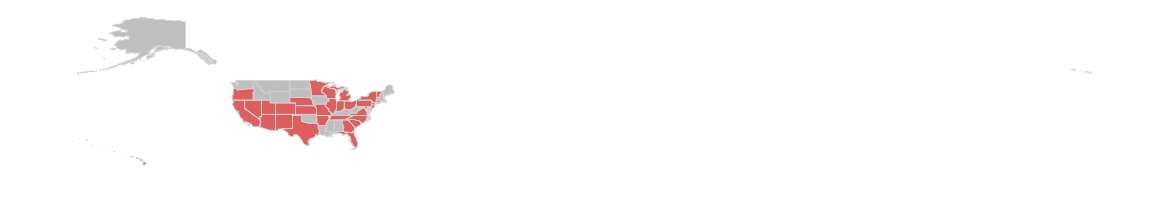

In [22]:
ax=us_states_powerplants_no_solar.plot(linewidth = 0.6, edgecolor = "lightgrey", color='grey', figsize = (20,7))
us_states_powerplants_solar.plot(linewidth = 0.6, edgecolor = "lightgrey", color='red', ax=ax, figsize = (20,7))   
ax.axis("off")



Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.

In [23]:
carbon_dioxide = pd.read_csv("Total Carbon Dioxide Emissions-StateRankings.csv")
carbon_dioxide.head()


,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,1,TX,642.0,NaN
1,2,CA,358.0,NaN
2,3,PA,245.0,NaN
3,4,IL,234.0,NaN
4,5,OH,232.0,NaN


In [24]:
us_states_powerplants_1 = us_states_powerplants
us_states_powerplants_1.drop_duplicates(subset="NAME", inplace = True)
us_states_powerplants_1.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442,72
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",1986,6293,International,Chugach Electric Assn Inc,3522,Electric Utility,Anchorage,Anchorage,99518,5601 Electron Dr.,natural gas,25.2,0.0,25.2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 25.2 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,61.168972,-149.911038,138
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",4633,56358,Western Renewable Energy,Western Renewable Energy LLC,54690,IPP Non-CHP,Eagar,Apache,85925,975 S. Water Canyon Rd.,biomass,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 2.5 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,34.093006,-109.289979,113
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",2833,10606,Georgia-Pacific Crossett LLC,Georgia-Pacific LLC,4580,Industrial CHP,Crossett,Ashley,71635,100 Suppply Rd,biomass,94.6,0.0,0.0,0.0,94.6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 94.6 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,33.142100,-91.975000,55
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",2944,10840,Covanta Delano Energy,Covanta Delano Inc,56099,IPP Non-CHP,Delano,Kern,93215,31500 Pond Road,biomass,49.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 49 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,35.714400,-119.233700,1222


In [25]:
us_states_powerplants_1.shape

(51, 41)

In [26]:
carbon_dioxide_states = us_states_powerplants_1.merge(carbon_dioxide, left_on = "STUSPS", right_on = "State")
carbon_dioxide_states.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,nuclear_count,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,16,Martin Dam,Alabama Power Co,195,Electric Utility,Dadeville,Elmore,36078,675 Overlook Drive,hydroelectric,186.0,0.0,0.0,0.0,NaN,186.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 186 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.680394,-85.911442,72,15,AL,123.0,NaN
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",1986,6293,International,Chugach Electric Assn Inc,3522,Electric Utility,Anchorage,Anchorage,99518,5601 Electron Dr.,natural gas,25.2,0.0,25.2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 25.2 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,61.168972,-149.911038,138,40,AK,35.0,NaN
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",4633,56358,Western Renewable Energy,Western Renewable Energy LLC,54690,IPP Non-CHP,Eagar,Apache,85925,975 S. Water Canyon Rd.,biomass,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 2.5 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,34.093006,-109.289979,113,23,AZ,93.0,NaN
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",2833,10606,Georgia-Pacific Crossett LLC,Georgia-Pacific LLC,4580,Industrial CHP,Crossett,Ashley,71635,100 Suppply Rd,biomass,94.6,0.0,0.0,0.0,94.6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 94.6 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,33.142100,-91.975000,55,29,AR,69.0,NaN
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",2944,10840,Covanta Delano Energy,Covanta Delano Inc,56099,IPP Non-CHP,Delano,Kern,93215,31500 Pond Road,biomass,49.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Biomass = 49 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607,35.714400,-119.233700,1222,2,CA,358.0,NaN


In [27]:
carbon_dioxide_states.crs

{'init': 'epsg:4326'}

(-6866894.1600311883,
 2963196.1190888165,
 -2418308.7035137336,
 4211019.8825783795)

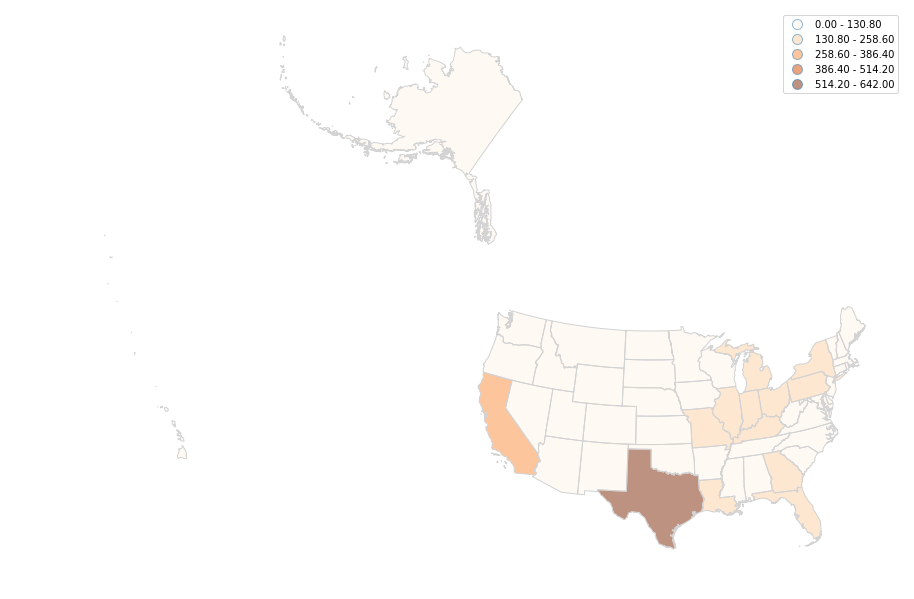

In [28]:
ax = carbon_dioxide_states.to_crs({"init":"epsg:2163"}).plot(figsize=(15,15), column= "Total Carbon Dioxide Emissions, million metric tons", cmap="Oranges", edgecolor="lightgrey", legend=True, scheme='equal_interval')
ax.axis("off")




Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

(-6866894.1600311883,
 2963196.1190888165,
 -2418308.7035137336,
 4211019.8825783795)

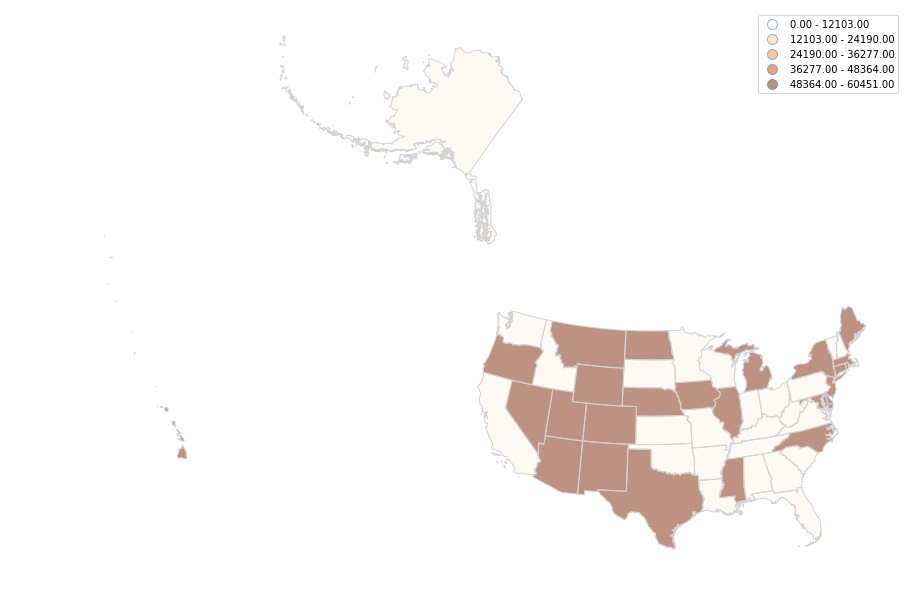

In [29]:
ax = carbon_dioxide_states.to_crs({"init":"epsg:2163"}).plot(figsize=(15,15), column= "Plant_Code", cmap="Oranges", edgecolor="lightgrey", legend=True, scheme='equal_interval')
ax.axis("off")


Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

(-6866894.1600311883,
 2963196.1190888165,
 -2418308.7035137336,
 4211019.8825783795)

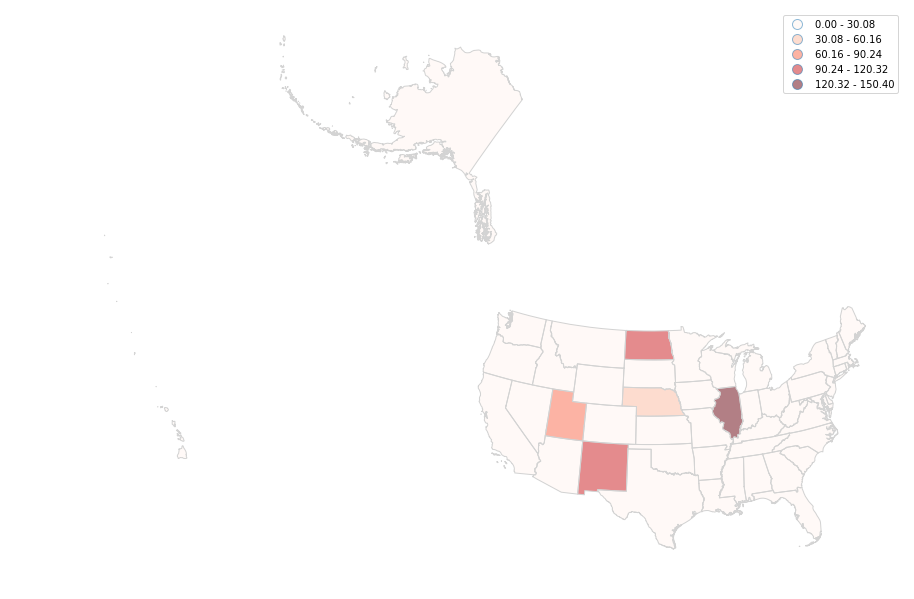

In [30]:
ax = carbon_dioxide_states.to_crs({"init":"epsg:2163"}).plot(figsize=(15,15), column= "Wind_MW", cmap="Reds", edgecolor="lightgrey", legend=True, scheme='equal_interval')
ax.axis("off")


Make a map of average air quality of each states, with high quality being light red and low quality being dark red

In [31]:
air_quality = pd.read_csv("pm25_annual_fixed.csv")
points = air_quality.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

air_quality = gpd.GeoDataFrame(air_quality, geometry = points)
air_quality.crs= {'init': 'epsg:4326'}
air_quality.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


In [32]:
states_air_quality = gpd.sjoin(us_states_conv.reset_index(), air_quality, how='left', op='intersects')
states_air_quality.head()


,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,1.0,97.0,3.0,88101.0,1.0,30.770181,-88.087761,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,7.635714,3.185176,17.7,2017-03-23 00:00,13.0,2017-03-17 00:00,12.5,2017-03-20 00:00,10.9,2017-03-05 00:00,NaN,NaN,NaN,NaN,17.7,17.7,13.0,12.5,9.1,7.2,4.3,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2017-05-18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",0,1.0,3.0,10.0,88101.0,1.0,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",2,1.0,33.0,1002.0,88101.0,1.0,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,1.0,125.0,4.0,88101.0,1.0,33.189931,-87.484189,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,26.0,21.0,N,26.0,122.0,0.0,4.0,0.0,0.0,Certification not required,0.0,7.469231,3.489615,18.4,2017-03-05 00:00,11.4,2017-03-29 00:00,10.7,2017-01-31 00:00,10.5,2017-03-20 00:00,NaN,NaN,NaN,NaN,18.4,18.4,11.4,10.7,10.0,7.2,3.4,"VA, TUSCALOOSA",3701 LOOP ROAD EAST,Alabama,Tuscaloosa,Tuscaloosa,"Tuscaloosa, AL",2017-05-18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7,1.0,73.0,1005.0,88101.0,1.0,33.331111,-87.003611,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,12

In [33]:
states_air_quality["air_count"] = states_air_quality.groupby('index').size()
states_air_quality.head()


,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,air_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,1.0,97.0,3.0,88101.0,1.0,30.770181,-88.087761,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,7.635714,3.185176,17.7,2017-03-23 00:00,13.0,2017-03-17 00:00,12.5,2017-03-20 00:00,10.9,2017-03-05 00:00,NaN,NaN,NaN,NaN,17.7,17.7,13.0,12.5,9.1,7.2,4.3,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",0,1.0,3.0,10.0,88101.0,1.0,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",2,1.0,33.0,1002.0,88101.0,1.0,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,1.0,125.0,4.0,88101.0,1.0,33.189931,-87.484189,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,26.0,21.0,N,26.0,122.0,0.0,4.0,0.0,0.0,Certification not required,0.0,7.469231,3.489615,18.4,2017-03-05 00:00,11.4,2017-03-29 00:00,10.7,2017-01-31 00:00,10.5,2017-03-20 00:00,NaN,NaN,NaN,NaN,18.4,18.4,11.4,10.7,10.0,7.2,3.4,"VA, TUSCALOOSA",3701 LOOP ROAD EAST,Alabama,Tuscaloosa,Tuscaloosa,"Tuscaloosa, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7,1.0,73.0,1005.0,88101.0,1.0,33.331111,-87.003611,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,2017.0,Micrograms/cubic meter (LC),No Even

In [34]:
states_air_quality['air_count'] = states_air_quality['air_count'].fillna(0)
states_air_quality.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,air_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,1.0,97.0,3.0,88101.0,1.0,30.770181,-88.087761,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,7.635714,3.185176,17.7,2017-03-23 00:00,13.0,2017-03-17 00:00,12.5,2017-03-20 00:00,10.9,2017-03-05 00:00,NaN,NaN,NaN,NaN,17.7,17.7,13.0,12.5,9.1,7.2,4.3,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",0,1.0,3.0,10.0,88101.0,1.0,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",2,1.0,33.0,1002.0,88101.0,1.0,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",17,1.0,125.0,4.0,88101.0,1.0,33.189931,-87.484189,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,26.0,21.0,N,26.0,122.0,0.0,4.0,0.0,0.0,Certification not required,0.0,7.469231,3.489615,18.4,2017-03-05 00:00,11.4,2017-03-29 00:00,10.7,2017-01-31 00:00,10.5,2017-03-20 00:00,NaN,NaN,NaN,NaN,18.4,18.4,11.4,10.7,10.0,7.2,3.4,"VA, TUSCALOOSA",3701 LOOP ROAD EAST,Alabama,Tuscaloosa,Tuscaloosa,"Tuscaloosa, AL",2017-05-18,18
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7,1.0,73.0,1005.0,88101.0,1.0,33.331111,-87.003611,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,2017.0,Micrograms/cubic meter (LC),No Even

In [35]:
states_air_quality.drop_duplicates(subset="NAME", inplace = True)


/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(-197.09527795, 197.72483894999999, -18.844392050000003, 75.660855050000009)

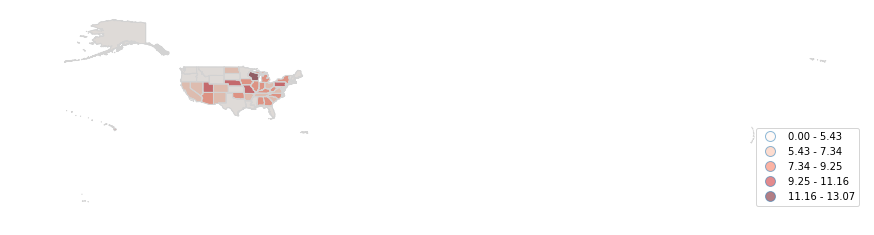

In [36]:
ax=us_states_powerplants_no_solar.plot(linewidth = 0.6, edgecolor = "lightgrey", color='grey', figsize=(15,15))
states_air_quality.plot(figsize=(15,15), column= "Arithmetic Mean", cmap="Reds", edgecolor="lightgrey", legend=True, scheme='equal_interval', ax=ax)
ax.axis("off")


Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(-9124457.9765335042,
 4358272.8286659662,
 -4184027.0213747746,
 5278419.621888997)

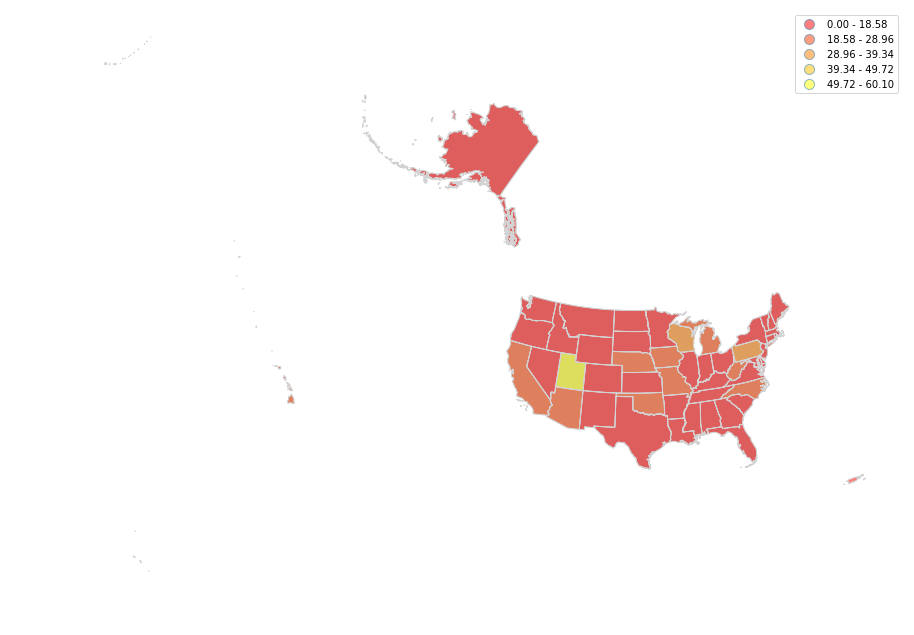

In [37]:
ax=us_states_powerplants_no_solar.to_crs({"init":"epsg:2163"}).plot(linewidth = 0.6, edgecolor = "lightgrey", color='grey', figsize=(15,15))
states_air_quality.to_crs({"init":"epsg:2163"}).plot(figsize=(15,15), column= "1st Max Value", cmap="autumn", edgecolor="lightgrey", legend=True, scheme='equal_interval', ax=ax)
ax.axis("off")


Map of average PM2.5 measurement by county

In [38]:
states_air_quality.head()

,index,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,air_count
0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",12,1.0,97.0,3.0,88101.0,1.0,30.770181,-88.087761,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,2.0,0.0,0.0,Certification not required,0.0,7.635714,3.185176,17.7,2017-03-23 00:00,13.0,2017-03-17 00:00,12.5,2017-03-20 00:00,10.9,2017-03-05 00:00,NaN,NaN,NaN,NaN,17.7,17.7,13.0,12.5,9.1,7.2,4.3,CHICKASAW,"Iroquois and Azalea, CHICKASAW, MOBILE CO., A...",Alabama,Mobile,Chickasaw,"Mobile, AL",2017-05-18,18
1,1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",18,4.0,13.0,9997.0,88101.0,1.0,33.503833,-112.095767,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017.0,Micrograms/cubic meter (LC),No Events,28.0,23.0,N,28.0,122.0,0.0,3.0,0.0,0.0,Certification not required,0.0,8.157143,4.320788,21.5,2017-01-07 00:00,15.2,2017-01-04 00:00,12.8,2017-02-03 00:00,12.4,2017-01-31 00:00,NaN,NaN,NaN,NaN,21.5,21.5,15.2,12.8,11.5,7.9,3.4,JLG SUPERSITE,4530 N 17TH AVENUE,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2017-04-19,4
3,3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",27,5.0,113.0,2.0,88101.0,1.0,34.583699,-94.226234,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017.0,Micrograms/cubic meter (LC),No Events,30.0,25.0,N,30.0,122.0,0.0,0.0,0.0,0.0,Certification not required,0.0,7.260000,2.890126,15.3,2017-01-13 00:00,11.7,2017-02-24 00:00,11.0,2017-03-14 00:00,10.5,2017-03-20 00:00,NaN,NaN,NaN,NaN,15.3,15.3,11.7,11.0,9.0,7.2,3.6,MENA,HORNBECK ROAD - MENA,Arkansas,Polk,Mena,NaN,2017-04-26,10
4,4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",37,6.0,23.0,1004.0,88101.0,1.0,40.776944,-124.177500,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017.0,Micrograms/cubic meter (LC),No Events,27.0,23.0,N,14.0,61.0,0.0,3.0,0.0,0.0,Certification not required,0.0,7.066667,5.535827,21.2,2017-01-28 00:00,19.0,2017-01-31 00:00,18.3,2017-01-16 00:00,12.7,2017-01-13 00:00,NaN,NaN,NaN,NaN,21.2,21.2,21.2,19.0,12.7,9.8,5.7,Jacobs,717 SOUTH AVENUE,California,Humboldt,Eureka,"Eureka-Arcata-Fortuna, CA",2017-05-16,36


In [39]:
us_counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
us_counties.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US19107,1500067253,1929323,107,00465242,19107,06,Keokuk,19,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
1,0500000US19189,1037261946,3182052,189,00465283,19189,06,Winnebago,19,"POLYGON ((-93.97076 43.499605, -93.88843009910..."
2,0500000US20093,2254696689,1133601,093,00485011,20093,06,Kearny,20,"POLYGON ((-101.54192 37.914575, -101.541863 37..."
3,0500000US20123,1817632928,44979981,123,00485026,20123,06,Mitchell,20,"POLYGON ((-98.49006799999999 39.241666, -98.49..."
4,0500000US20187,1762104518,178555,187,00485055,20187,06,Stanton,20,"POLYGON ((-102.041899 37.541186, -102.041894 3..."


In [42]:
us_counties = us_counties.to_crs(air_quality.crs)
us_counties.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US19107,1500067253,1929323,107,00465242,19107,06,Keokuk,19,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
1,0500000US19189,1037261946,3182052,189,00465283,19189,06,Winnebago,19,"POLYGON ((-93.97076 43.499605, -93.88843009910..."
2,0500000US20093,2254696689,1133601,093,00485011,20093,06,Kearny,20,"POLYGON ((-101.54192 37.914575, -101.541863 37..."
3,0500000US20123,1817632928,44979981,123,00485026,20123,06,Mitchell,20,"POLYGON ((-98.49006799999999 39.241666, -98.49..."
4,0500000US20187,1762104518,178555,187,00485055,20187,06,Stanton,20,"POLYGON ((-102.041899 37.541186, -102.041894 3..."


In [43]:
air_quality.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


In [48]:
counties_air_quality = gpd.sjoin(us_counties.reset_index(), air_quality, how='left', op='within')
counties_air_quality.head()

,index,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,0,0500000US19107,1500067253,1929323,107,00465242,19107,06,Keokuk,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0500000US19189,1037261946,3182052,189,00465283,19189,06,Winnebago,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0500000US20093,2254696689,1133601,093,00485011,20093,06,Kearny,20,"POLYGON ((-101.54192 37.914575, -101.541863 37...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0500000US20123,1817632928,44979981,123,00485026,20123,06,Mitchell,20,"POLYGON ((-98.49006799999999 39.241666, -98.49...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0500000US20187,1762104518,178555,187,00485055,20187,06,Stanton,20,"POLYGON ((-102.041899 37.541186, -102.041894 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
counties_air_quality = counties_air_quality.fillna(0)
counties_air_quality.head()

,index,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry,index_right,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,0,0500000US19107,1500067253,1929323,107,00465242,19107,06,Keokuk,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,1,0500000US19189,1037261946,3182052,189,00465283,19189,06,Winnebago,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,2,0500000US20093,2254696689,1133601,093,00485011,20093,06,Kearny,20,"POLYGON ((-101.54192 37.914575, -101.541863 37...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,3,0500000US20123,1817632928,44979981,123,00485026,20123,06,Mitchell,20,"POLYGON ((-98.49006799999999 39.241666, -98.49...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,4,0500000US20187,1762104518,178555,187,00485055,20187,06,Stanton,20,"POLYGON ((-102.041899 37.541186, -102.041894 3...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


(-9124457.9765335042,
 4358272.8286659662,
 -4184027.0213747746,
 5278419.621888997)

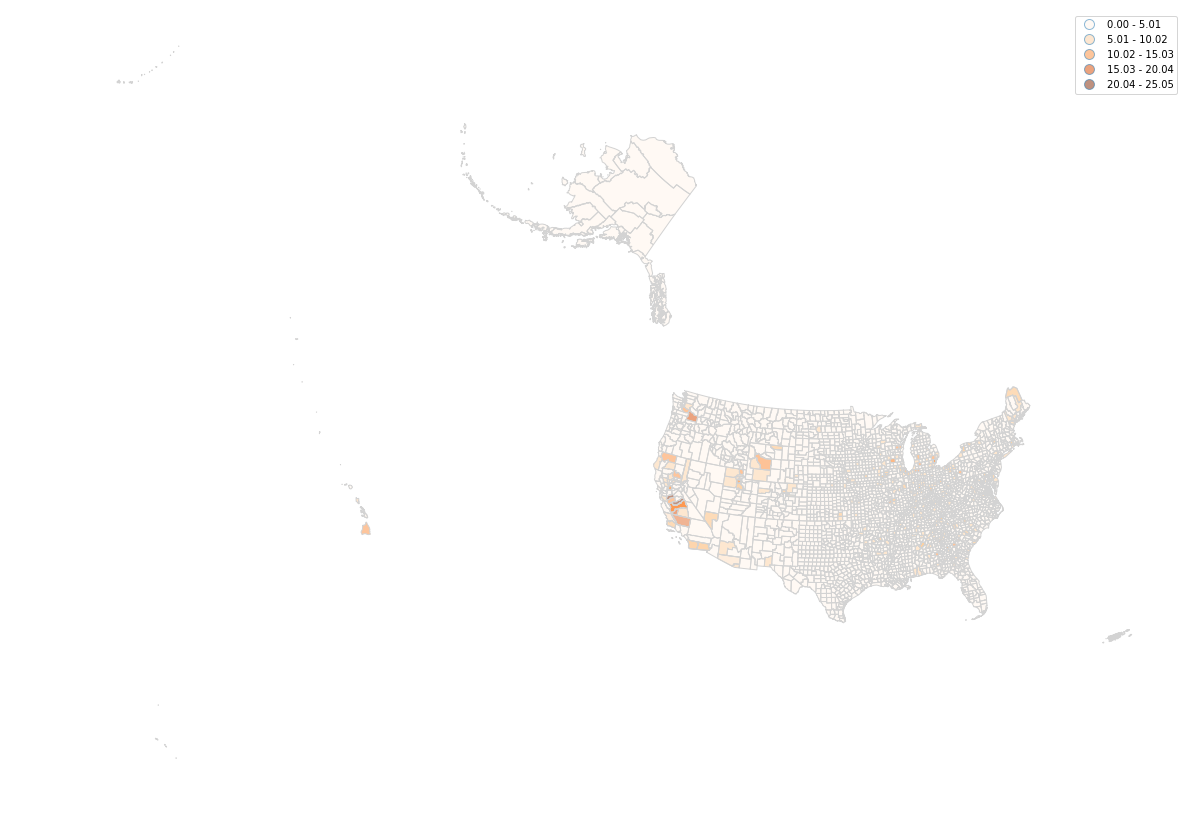

In [53]:
ax = counties_air_quality.to_crs({"init":"epsg:2163"}).plot(figsize=(20,15), column= "Arithmetic Mean", cmap="Oranges", edgecolor="lightgrey", legend=True, scheme='equal_interval')
ax.axis("off")


Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [74]:
renewable_plants_states = power_plants_states.groupby("NAME")["PrimSource"].value_counts().reset_index(name="renewable")
renewable_plants_states.head()

,NAME,PrimSource,renewable
0,Alabama,hydroelectric,23
1,Alabama,natural gas,22
2,Alabama,biomass,13
3,Alabama,coal,6
4,Alabama,other,3


In [75]:
renewable_plants_states_good = renewable_plants_states[renewable_plants_states["PrimSource"].isin(["hydroelectric", "wind", "solar"])]

renewable_plants_states_good.head()




,NAME,PrimSource,renewable
0,Alabama,hydroelectric,23
8,Alaska,hydroelectric,23
11,Alaska,wind,4
14,Arizona,solar,57
16,Arizona,hydroelectric,7


In [77]:
renewable_plants_states_good_sum = renewable_plants_states_good.groupby("NAME")["renewable"].sum().reset_index()
renewable_plants_states_good_sum.head()

,NAME,renewable
0,Alabama,23
1,Alaska,27
2,Arizona,68
3,Arkansas,20
4,California,750


In [68]:
non_renewable_plants_states = renewable_plants_states[~renewable_plants_states["PrimSource"].isin(["hydroelectric", "wind", "solar"])]
non_renewable_plants_states.head()

,NAME,PrimSource,count
1,Alabama,natural gas,22
2,Alabama,biomass,13
3,Alabama,coal,6
4,Alabama,other,3
5,Alabama,petroleum,3


In [72]:
non_renewable_plants_states_sum = non_renewable_plants_states.groupby("NAME")["count"].sum().reset_index()
non_renewable_plants_states_sum.head()

,NAME,count
0,Alabama,49
1,Alaska,111
2,Arizona,45
3,Arkansas,35
4,California,472


In [79]:
renewable_plants_states_good_sum_merged = renewable_plants_states_good_sum.merge(non_renewable_plants_states_sum, left_on = "NAME", right_on="NAME")

In [81]:
renewable_plants_states_good_sum_merged.head()

,NAME,renewable,count
0,Alabama,23,49
1,Alaska,27,111
2,Arizona,68,45
3,Arkansas,20,35
4,California,750,472


In [87]:
renewable_plants_states_good_sum_merged["percentage_renewable"] = (renewable_plants_states_good_sum_merged["renewable"] / renewable_plants_states_good_sum_merged["count"])* 100

In [90]:
renewable_plants_states_good_sum_merged["total"]= renewable_plants_states_good_sum_merged["renewable"] + renewable_plants_states_good_sum_merged["count"]

In [92]:
renewable_plants_states_good_sum_merged["percentage_renewable_right_answer"] =(renewable_plants_states_good_sum_merged["renewable"] / renewable_plants_states_good_sum_merged["total"]) * 100 

In [93]:
renewable_plants_states_good_sum_merged

,NAME,renewable,count,percentage_renewable,total,percentage_renewable_right_answer
0,Alabama,23,49,46.938776,72,31.944444
1,Alaska,27,111,24.324324,138,19.565217
2,Arizona,68,45,151.111111,113,60.176991
3,Arkansas,20,35,57.142857,55,36.363636
4,California,750,472,158.898305,1222,61.374795
5,Colorado,97,56,173.214286,153,63.398693
6,Connecticut,17,71,23.943662,88,19.318182
7,Delaware,8,17,47.058824,25,32.000000
8,Florida,19,125,15.200000,144,13.194444
9,Georgia,50,89,56.179775,139,35.971223
